<a id="000"></a>
# Predicting Sales using marketing budget !

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv("Data_HSS.csv")

In [4]:
df.head()

,TV,Radio,Social Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [5]:
df.shape

(4572, 5)

In [6]:
df.isnull().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [7]:
df = df.dropna()

In [8]:
df.shape

(4546, 5)

In [9]:
df.dtypes

TV              float64
Radio           float64
Social Media    float64
Influencer       object
Sales           float64
dtype: object

In [10]:
df.describe()

,TV,Radio,Social Media,Sales
count,4546.000000,4546.000000,4546.000000,4546.000000
mean,54.062912,18.157533,3.323473,192.413332
std,26.104942,9.663260,2.211254,93.019873
min,10.000000,0.000684,0.000031,31.199409
25%,32.000000,10.555355,1.530822,112.434612
50%,53.000000,17.859513,3.055565,188.963678
75%,77.000000,25.640603,4.804919,272.324236
max,100.000000,48.871161,13.981662,364.079751


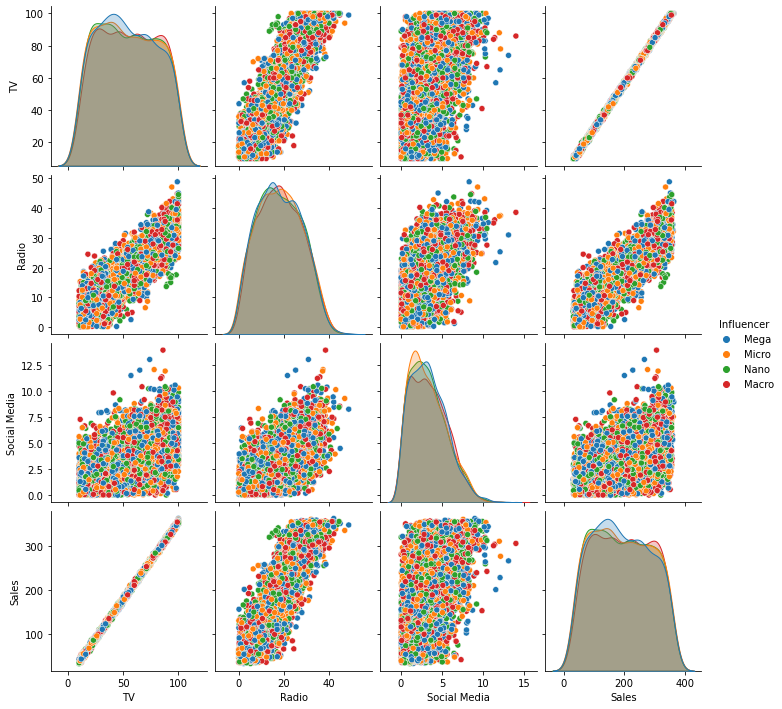

In [11]:
sns.pairplot(df, hue='Influencer')

<AxesSubplot:xlabel='TV', ylabel='Sales'>

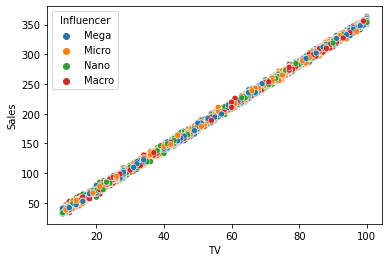

In [12]:
sns.scatterplot(data=df, x='TV', y='Sales', hue='Influencer' )

<AxesSubplot:xlabel='Radio', ylabel='Sales'>

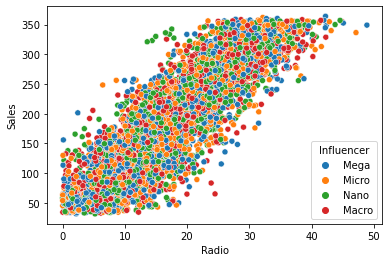

In [13]:
sns.scatterplot(data=df, x='Radio', y='Sales', hue='Influencer' )

<AxesSubplot:xlabel='Social Media', ylabel='Sales'>

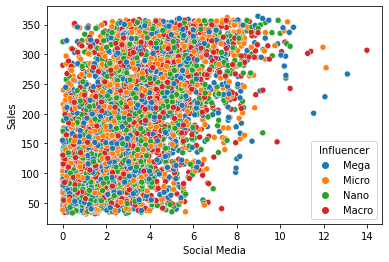

In [14]:
sns.scatterplot(data=df, x='Social Media', y='Sales', hue='Influencer' )

<AxesSubplot:xlabel='Influencer', ylabel='Sales'>

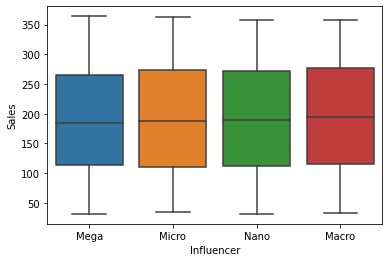

In [15]:
sns.boxplot(data=df,
           x="Influencer", 
            y="Sales")

In [16]:
X = df.drop('Sales', axis=1)

In [17]:
X.head()

,TV,Radio,Social Media,Influencer
0,16.0,6.566231,2.907983,Mega
1,13.0,9.237765,2.409567,Mega
2,41.0,15.886446,2.913410,Mega
3,83.0,30.020028,6.922304,Mega
4,15.0,8.437408,1.405998,Micro


In [18]:
y = df['Sales']

In [19]:
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder

from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
num_features = ["TV", "Radio", "Social Media"]

cat_features = ["Influencer"]

In [22]:
num_pipeline = Pipeline([
    ('std_scaler', StandardScaler())
])

In [23]:
cat_pipeline = Pipeline([
    ('ohe', OneHotEncoder(sparse=False, handle_unknown="ignore"))
])


In [24]:
full_pipeline = ColumnTransformer([
    ("numerical", num_pipeline, num_features),
    ("categorical", cat_pipeline, cat_features),
])

In [25]:
full_pipeline.fit(X_train)

full_pipeline.transform(X_train)

array([[ 1.60426873,  1.60708463,  2.44575014, ...,  0.        ,
         1.        ,  0.        ],
       [-1.22133784, -1.6053864 , -0.24621731, ...,  0.        ,
         0.        ,  0.        ],
       [-0.76313137,  0.15325983,  0.77539337, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.7249475 , -0.16447672, -0.17621722, ...,  0.        ,
         0.        ,  1.        ],
       [-0.61039588, -0.94588662, -1.10888463, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.45875256,  1.13805179,  1.70761605, ...,  0.        ,
         1.        ,  0.        ]])

In [26]:
# Get the list of categories generated by the process
ohe_categories = full_pipeline.named_transformers_["categorical"][0].categories_

In [27]:
ohe_categories

[array(['Macro', 'Mega', 'Micro', 'Nano'], dtype=object)]

In [28]:
# This is the categorical column in our dataframe
cat_features

['Influencer']

In [29]:
# Create names for one hot encoded columns so that they can be understood in our dataframe instead of matrix of array

new_ohe_features = []


for col, vals in zip(cat_features, ohe_categories):
    for val in vals:
        new_ohe_features.append(str(col) + "__" + str(val))

In [30]:
new_ohe_features

['Influencer__Macro',
 'Influencer__Mega',
 'Influencer__Micro',
 'Influencer__Nano']

In [31]:
# Create a new list with all names of features
all_features = num_features + new_ohe_features

In [32]:
X_train = pd.DataFrame(full_pipeline.transform(X_train), columns=all_features)
X_test = pd.DataFrame(full_pipeline.transform(X_test), columns=all_features)

In [33]:
X_train.head()

,TV,Radio,Social Media,Influencer__Macro,Influencer__Mega,Influencer__Micro,Influencer__Nano
0,1.604269,1.607085,2.445750,0.0,0.0,1.0,0.0
1,-1.221338,-1.605386,-0.246217,1.0,0.0,0.0,0.0
2,-0.763131,0.153260,0.775393,1.0,0.0,0.0,0.0
3,-0.801315,-0.518300,-1.156584,0.0,0.0,1.0,0.0
4,0.916959,0.389439,-0.388297,0.0,0.0,1.0,0.0


In [34]:
X_test.head()

,TV,Radio,Social Media,Influencer__Macro,Influencer__Mega,Influencer__Micro,Influencer__Nano
0,-1.488625,-1.519260,-0.469100,0.0,0.0,1.0,0.0
1,-1.297706,-1.080730,-0.342413,0.0,1.0,0.0,0.0
2,0.802407,0.221998,-0.954298,0.0,0.0,1.0,0.0
3,0.038730,0.197117,-0.271409,0.0,1.0,0.0,0.0
4,0.878775,1.391485,2.025187,0.0,0.0,0.0,1.0


<a id="4.1"></a>
## 4.1. Linear Regression

#### Define Linear Regression model

In [35]:
lin_reg = LinearRegression()

#### Define the parameters grid for Linear Regression

In [36]:
param_grid = [
    {'fit_intercept' : [True, False]}
]

#### Define the Grid Search CV with linear regression model and pass parameter grid in it with 5 folds

In [37]:
linreg_grid_search = GridSearchCV(lin_reg, param_grid, cv=5,
                                  scoring='neg_mean_squared_error',
                                  return_train_score=True)

#### Fit the Grid Search

In [38]:
linreg_grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid=[{'fit_intercept': [True, False]}],
             return_train_score=True, scoring='neg_mean_squared_error')

#### Find the best parameters of grid search

In [39]:
linreg_grid_search.best_params_

{'fit_intercept': False}

#### How did both of the parameters score in our 5 slpits?

In [40]:
cvres_linreg = linreg_grid_search.cv_results_

In [41]:
for mean_score, params in zip(cvres_linreg["mean_test_score"], cvres_linreg["params"]):
    print(np.sqrt(-mean_score), params)

2.973008330674379 {'fit_intercept': True}
2.9730083306743778 {'fit_intercept': False}


In [42]:
linreg_cvres = pd.DataFrame(cvres_linreg)

In [43]:
linreg_cvres.iloc[:, 6:12]

,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score
0,-9.352735,-9.086627,-8.736442,-8.700867,-8.317221,-8.838779
1,-9.352735,-9.086627,-8.736442,-8.700867,-8.317221,-8.838779


#### Select the tuned model as the model

In [44]:
linreg_tuned = linreg_grid_search.best_estimator_

In [45]:
from sklearn.metrics import mean_squared_error

In [46]:
sales_predictions_linreg_train = linreg_tuned.predict(X_train)

#### Metrics on training set

In [47]:
lin_mse_train = mean_squared_error(y_train, sales_predictions_linreg_train)

In [48]:
lin_rmse_train = np.sqrt(lin_mse_train)
lin_rmse_train

2.9642897971413884

#### Metrics on test set

In [49]:
sales_predictions_linreg_test = linreg_tuned.predict(X_test)

In [50]:
lin_mse_test = mean_squared_error(y_test,sales_predictions_linreg_test)

In [51]:
lin_rmse_test = np.sqrt(lin_mse_test)

lin_rmse_test

2.884903518340301

In [52]:
linreg_tuned = linreg_grid_search.best_estimator_

##### A way to predict the dataframe as training was dataframe and not array

In [53]:
linreg_tuned.predict(pd.DataFrame([{'TV':1.6, 'Radio':1.6, 'Social Media':2.44, 'Influencer__Macro':0, 'Influencer__Mega':0,
                                   'Influencer__Micro':1.0, 'Influencer__Nano':0.0}]))

array([341.29320002])

In [54]:
linreg_tuned.predict(pd.DataFrame([{'TV':1.6, 'Radio':1.6, 'Social Media':2.44, 'Influencer__Macro':0, 'Influencer__Mega':0,
                                   'Influencer__Micro':1.0, 'Influencer__Nano':0.0}]))

array([341.29320002])

In [55]:
y_train.head()

566     343.046048
3972     84.115663
2123    118.885553
3305    123.857810
4358    277.459436
Name: Sales, dtype: float64

In [57]:
import pickle
# open a file, where you ant to store the data
file = open('linear_regression_model.pkl', 'wb')

# dump information to that filed
pickle.dump(linreg_tuned, file)

In [56]:
import pickle
filename = 'finalized_model.pkl'
pickle.dump(linreg_tuned, open(filename, 'wb'))

--- 